In [130]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt

from tqdm import tqdm

print("Loading data...")
# Load in the stop_events from the previous stage in the pipeline
time_series_1hour_chd = pd.read_csv(
    "../Intermediate_Data/diff_1hour_code_hour_day_percent_full_segment_time_series.csv",
)

time_series_1hour_c = pd.read_csv(
    "../Intermediate_Data/diff_1hour_code_percent_full_segment_time_series.csv",
)

time_series_10mins_chd = pd.read_csv(
    "../Intermediate_Data/diff_10mins_code_hour_day_percent_full_segment_time_series.csv",
)

time_series_10mins_c = pd.read_csv(
    "../Intermediate_Data/diff_10mins_code_percent_full_segment_time_series.csv",
)

time_series_5mins_chd = pd.read_csv(
    "../Intermediate_Data/diff_5mins_code_hour_day_percent_full_segment_time_series.csv",
)

time_series_5mins_c = pd.read_csv(
    "../Intermediate_Data/diff_5mins_code_percent_full_segment_time_series.csv",
)



time_series_1hour_chd["arrival_1hour"] = time_series_1hour_chd["arrival_1hour"].astype("datetime64[ns]")
time_series_1hour_c["arrival_1hour"] = time_series_1hour_c["arrival_1hour"].astype("datetime64[ns]")

time_series_1hour_chd.set_index('arrival_1hour')
time_series_1hour_c.set_index('arrival_1hour')

time_series_10mins_chd["arrival_10mins"] = time_series_10mins_chd["arrival_10mins"].astype("datetime64[ns]")
time_series_10mins_c["arrival_10mins"] = time_series_10mins_c["arrival_10mins"].astype("datetime64[ns]")

time_series_10mins_chd.set_index('arrival_10mins')
time_series_10mins_c.set_index('arrival_10mins')

time_series_5mins_chd["arrival_5mins"] = time_series_5mins_chd["arrival_5mins"].astype("datetime64[ns]")
time_series_5mins_c["arrival_5mins"] = time_series_5mins_c["arrival_5mins"].astype("datetime64[ns]")

time_series_5mins_chd.set_index('arrival_5mins')
time_series_5mins_c.set_index('arrival_5mins')

print("\tLoaded")


Loading data...
	Loaded


In [123]:
correlations_1hour_chd = time_series_1hour_chd.corr(method='pearson', min_periods=10)
correlations_1hour_chd = correlations_1hour_chd.fillna(value = float('-inf'))

In [124]:
correlations_1hour_c = time_series_1hour_c.corr(method='pearson', min_periods=10)
correlations_1hour_c = correlations_1hour_c.fillna(value = float('-inf'))

In [127]:
correlations_10mins_chd = time_series_10mins_chd.corr(method='pearson', min_periods=10)
correlations_10mins_chd = correlations_10mins_chd.fillna(value = float('-inf'))

In [128]:
correlations_10mins_c = time_series_10mins_c.corr(method='pearson', min_periods=10)
correlations_10mins_c = correlations_10mins_c.fillna(value = float('-inf'))

In [131]:
correlations_5mins_chd = time_series_5mins_chd.corr(method='pearson', min_periods=10)
correlations_5mins_chd = correlations_5mins_chd.fillna(value = float('-inf'))

In [132]:
correlations_5mins_c = time_series_5mins_c.corr(method='pearson', min_periods=10)
correlations_5mins_c = correlations_5mins_c.fillna(value = float('-inf'))

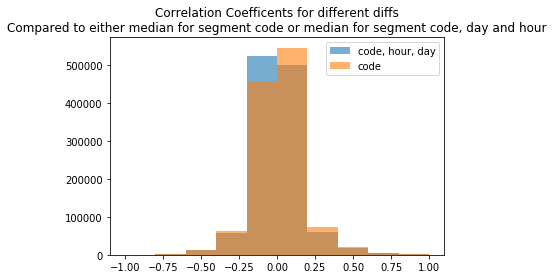

In [133]:
plt.hist(correlations_5mins_chd.values.flatten(), range=(-1,1), alpha=0.6, label="code, hour, day")
plt.hist(correlations_5mins_c.values.flatten(), range=(-1,1), alpha=0.6, label="code")
plt.legend()
plt.title("Correlation Coefficents for different diffs\nCompared to either median for segment code or median for segment code, day and hour")
plt.show()


In [90]:
np.sort(correlations.values, axis=1)[:, -10:-1]

array([[0.4716107 , 0.48202497, 0.50759546, ..., 0.67467248, 0.6843296 ,
        0.78395267],
       [0.40722931, 0.42551459, 0.4263803 , ..., 0.4810748 , 0.48932614,
        0.49638925],
       [0.44929526, 0.45038271, 0.46719706, ..., 0.65298701, 0.80909651,
        0.9072656 ],
       ...,
       [0.40930706, 0.42577954, 0.45296136, ..., 0.57400987, 0.64817425,
        0.67981253],
       [      -inf,       -inf,       -inf, ...,       -inf,       -inf,
              -inf],
       [0.45586031, 0.45985443, 0.46605107, ..., 0.53747858, 0.5510659 ,
        0.656135  ]])

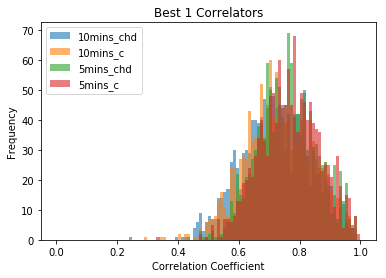

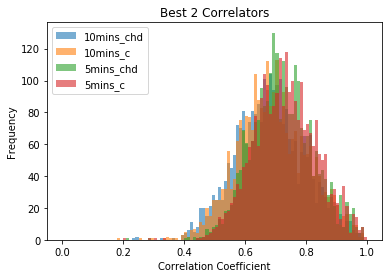

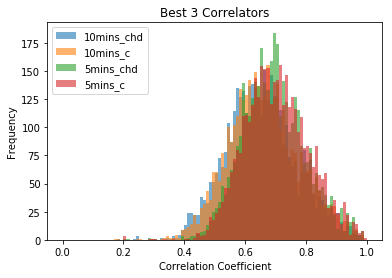

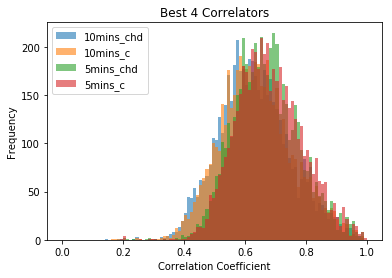

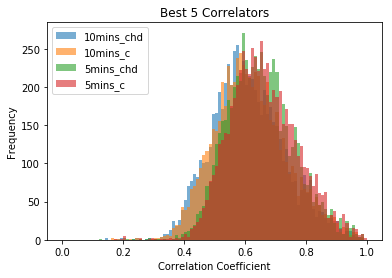

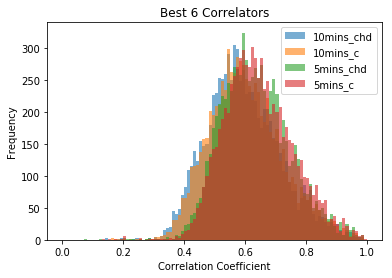

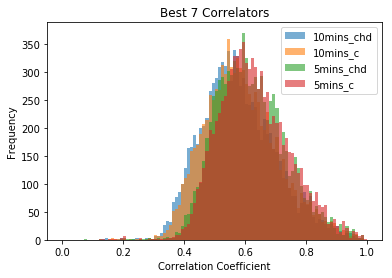

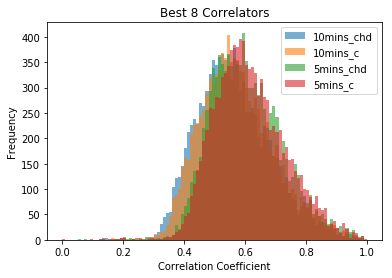

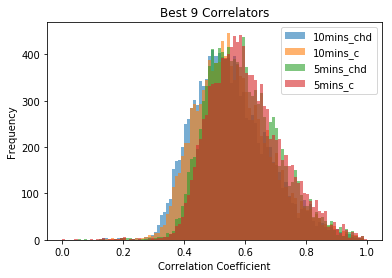

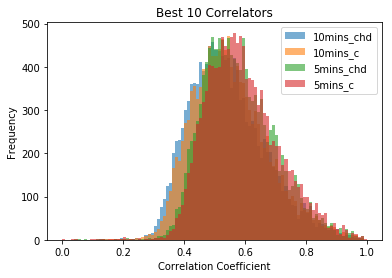

In [134]:
for i in range(2, 12):
#     plt.hist(np.sort(correlations_1hour_chd.values, axis=1)[:, -i:-1].flatten(), bins=100, range=(0,1), alpha=0.6, label="1h_chd")
#     plt.hist(np.sort(correlations_1hour_c.values, axis=1)[:, -i:-1].flatten(), bins=100, range=(0,1), alpha=0.6, label="1h_c")
    plt.hist(np.sort(correlations_10mins_chd.values, axis=1)[:, -i:-1].flatten(), bins=100, range=(0,1), alpha=0.6, label="10mins_chd")
    plt.hist(np.sort(correlations_10mins_c.values, axis=1)[:, -i:-1].flatten(), bins=100, range=(0,1), alpha=0.6, label="10mins_c")
    plt.hist(np.sort(correlations_5mins_chd.values, axis=1)[:, -i:-1].flatten(), bins=100, range=(0,1), alpha=0.6, label="5mins_chd")
    plt.hist(np.sort(correlations_5mins_c.values, axis=1)[:, -i:-1].flatten(), bins=100, range=(0,1), alpha=0.6, label="5mins_c")


    plt.title(f"Best {i-1} Correlators")
    plt.xlabel("Correlation Coefficient")
    plt.ylabel("Frequency")
    plt.legend()
    plt.show()

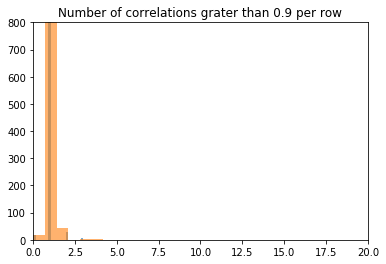

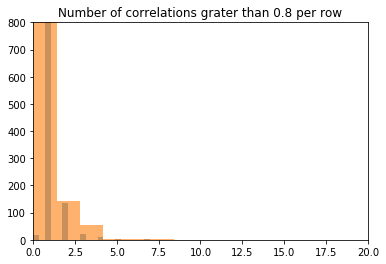

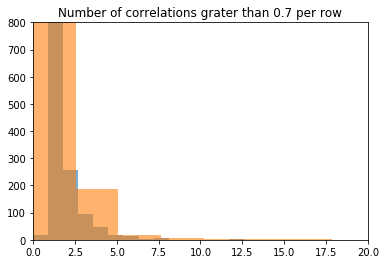

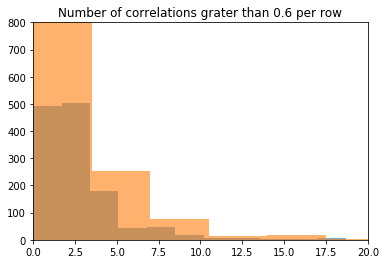

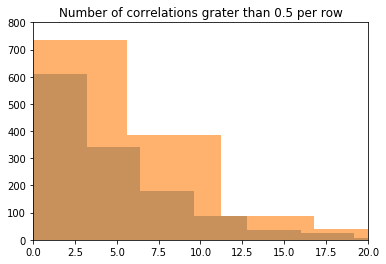

In [120]:
for i in np.linspace(0.9, 0.5, 5):
    plt.hist((correlations_chd.values > i).sum(axis=1), bins=20, alpha=0.6, label="Code, hour, day")
    plt.hist((correlations_c.values > i).sum(axis=1), bins=20, alpha=0.6, label="Code")
    plt.ylim(0, 800)
    plt.xlim(0, 20)
    plt.title(f"Number of correlations grater than {i} per row")
    plt.show()

In [113]:
pd.DataFrame(np.fliplr(time_series_c.columns[np.argsort(correlations_c.values, axis=1)[:, -31:-1]]), index=correlations_c.index)

,0,1,2,3,4,5,6,7,8,9,...,20,21,22,23,24,25,26,27,28,29
1200BOB20136_1200BOB20141_1,1280POA11361_1280POA11363_1,1200POA10442_1200POA10440_1,1280POA11374_1280POA11370_0,1200DOA90799_1200POA11727_1,1290DOB21071_1290DOB20964_1,1200BOB20182_1200BOB20141_1,1290DOB21192_1290DOB21190_0,1200POA10884_1200POA10882_0,1290BOB20474_1290BOB20465_1,1280POA11696_1280POA11698_0,...,1200POA10695_1200DOA25083_0,1280POA11370_1280POA11368_1,1290BOB20022_1290BOB20016_1,1290DOB20981_1290DOB20979_0,1290DOB21182_1290DOB21150_0,1290BOA56564_1290BOB20465_1,1200POA10896_1200POA10898_0,1280POA11376_1280POA11374_1,1290DOB20940_1280POA11717_0,1200POA10723_1200POA10726_0
1200BOB20136_1200DOY29324_1,1290BOB20225_1290BOA05343_0,1280POA11575_1280POA11578_0,1200BOB20194_1200DOA90972_0,1290BOB20202_1200BOB20192_0,1290BOB20499_1290BOB20500_0,1280POA11612_1280POA11582_0,1280POA11604_1280POA11601_0,1290BOB20276_1290BOB20278_1,1280POA11285_1280POA11286_0,1280POA11572_1280POA11570_0,...,1290BOB20575_1290BOB20568_1,1200DOA90846_1200POA10892_1,1290BOA90857_1290DOB21130_0,1280DOB20952_1280DOB20954_0,1280BOB20047_1280BOB20037_0,1280POA11506_1280POA11500_1,1280POA11306_1280POA11307_0,1290BOB20535_1290BOB20530_0,1280POA11474_1280POA11504_0,1280POA11442_1280POZ00737_0
1200BOB20137_1200DOB21235_0,1200POA10694_1200POA10696_0,1200DOA25032_1200POA10725_0,1200BOB20194_1200DOA90972_0,1200BTX38445_1200BTX38447_0,1200POA11727_1290DOB20913_0,1200BOB20182_1200BOB20141_1,1290DOB21184_1200DOB21230_1,1200POA10441_1200POA10443_1,1200DOB21234_1200BOB20136_0,1290POA11716_1290DOB20939_1,...,1200DOA91018_1200DOA90900_1,1290WDX38483_1290BOB20228_0,1280POA90816_1280POA11429_0,1280POA90818_1280POA12694_0,1290BOB20013_1290BOB20011_0,1200POA10445_1200POA10442_1,1290DOB20908_1290DOB20905_0,1200POA10725_1200POA10724_0,1280POA11352_1280POA11354_0,1280POA11267_1280POA11387_0
1200BOB20137_1200DOZ04831_1,1280POA11697_1280POA31677_0,1280POA11700_1280POA11697_0,1280POA11701_1280POA11703_0,1280POA11702_1280POA11700_0,1280POA11703_1280POA11705_0,1280POA11704_1280POA11702_0,1280POA11705_1280POA11352_1,1280POA11706_1290BOB20019_0,1280POA11708_1280POZ00735_0,1280POA11710_1280BTX38432_0,...,1280POZ00735_1280POA11712_0,1280POA11695_1280POA11696_0,1280POA11596_1280POA11595_0,1280POA11596_1280POA11848_0,1280POA11597_1280POA11598_0,1280POA11598_1280POA11600_0,1280POA11599_1280POA11596_0,1280POA11599_1280POA11596_1,1280POA11600_1280POA11603_0,1280POA11600_1280POA11603_1
1200BOB20141_1200BOB20144_0,1290BOB20022_1290BOB20016_1,1290DOB21119_1290DOB21121_1,1280BOB20044_1280BOB20043_0,1280POA11695_1280POA11696_0,1290DOB21054_1200POA11728_1,1280POA11378_1280POA31703_1,1290DOB21017_1290DOB21025_0,1280POA31678_1280POA05353_1,1290DOB20979_1290BOB20091_0,1200BTX38450_1200BTX38448_0,...,1200POA10754_1200DOA91057_1,1200POA10897_1200POA10895_0,1200BOB20146_1200DOY38562_1,1200BOB20182_1200BOB20141_1,1290DOB21182_1290BOB20474_0,1280POA90818_1280POA12694_0,1280DOB20943_1280DOB20945_1,1290BOB20125_1290BOB20124_0,1200POA10884_1200POA10882_0,1290DOB21213_1290DOB21210_0
1200BOB20142_1200DOY29325_0,1280POA11697_1280POA31677_0,1280POA11312_1280POA05360_0,1290BOB20065_1290DOB20884_1,1290DOB20935_1290DOB20939_1,1290DOB21155_1290DOB21152_0,1290BOB20089_1290BOB20090_0,1280POZ00737_1280POA90816_1,1200DOA90901_1200DOA05710_0,1200POA10884_1200POA10882_0,1200DOA05852_1200DOA90901_0,...,1200BTX38446_1200BTX38442_0,1290DOB21190_1290DOB21187_0,1290DOB20963_1290BOA05882_1,1290BOA56564_1290BOB20465_1,1290DOB21023_1290BOA05922_0,1290DOB21182_1290BOA90853_1,1200BOB20142_1200DOY29325_0,1280POA11363_1280POA11366_0,1280POA11374_1280POA11370_0,1200POA10723_1200POA10726_0
1200BOB20142_1200DOY29325_1,1290DOB21192_1290DOB21190_0,1280POA11357_1280POA11355_0,1200DOA25033_1200POA10699_0,1200POA10696_1200POA10698_1,1200BOB20182_1200DOY29324_1,1200POA10894_1200DOA90902_0,1290DOB21030_1290DOB21108_0,1200DOA90901_1200DOA05710_0,1280POA11312_1280POA05360_0,1200POA11727_1290DOB21017_1,...,1200BOB20141_1200BOB20144_0,1200POA10447_1200POA10445_1,1290DOB21026_1290DOB21028